In [1]:
from numpy import *
from GRpy.all import *
init_printing()
#init_printing(use_latex='mathjax')

In [2]:
t, x0, r, th, phi = symbols('t, x^0, r, theta, varphi',positive=True , real=True)
m,a = symbols('m,a', positive = True)
ut, omega, v, p2 = symbols('u_t, omega, v, p2', real=True)
M = Symbol('M', real=True)
s = Symbol('s', real=True)
S = Symbol('S', real=True)
pt = Function(r'p^t')(s)
uphi = Function(r'u^{\phi}')(s)
pphi = Function(r'p^{\phi}')(s)
st = Function(r'S^t')(s)
sr = Function(r'S^r')(s)
stheta = Function(r'S^{\theta}')(s)
sphi = Function(r'S^{\phi}')(s)

In [3]:
sigma = r**2 + (a*cos(th))**2
delta = r**2 - 2*m*r + a**2

In [4]:
g = Metric((x0, r, th, phi))
g[-0,-0] = (1-(2*m*r/sigma))
g[-0,-1] = 0
g[-0,-2] = 0
g[-0,-3] = (2*a*m*r*sin(th)**2)/sigma
g[-1,-0] = 0
g[-1,-1] = -sigma/delta
g[-1,-2] = 0
g[-1,-3] = 0
g[-2,-0] = 0
g[-2,-1] = 0
g[-2,-2] = -sigma
g[-2,-3] = 0
g[-3,-0] = (2*a*m*r*sin(th)**2)/sigma
g[-3,-1] = 0
g[-3,-2] = 0
g[-3,-3] = -(r**2 +a**2 + (2*a**2*m*r*sin(th)**2)/sigma)*sin(th)**2

In [5]:
ginv = g.invert()
chris = Christoffel(g)
riem = Riemann(chris)

In [6]:
def dw(A,mu):
    downvector=0
    for nu in range(4):
        downvector += g.components[(-mu,-nu)]*A[nu]
    
    return simplify(downvector.subs(th,pi/2))

def down(A):
    return [dw(A,mu) for mu in range(4)]

def uw(A,mu):
    upvector=0
    for nu in range(4):
        upvector += ginv.components[(mu,nu)]*A[nu]
    
    return simplify(upvector.subs(th,pi/2))

def up(A):
    return [uw(A,mu) for mu in range(4)]

In [7]:
sup=[0,0,S/r,0]
pup=[pt,0,0,omega*pt]

sdown=down(sup)
pdown=down(pup)

In [8]:
uupnonorm=[ut,0,0,uphi]

N=0
for i in range(4):
    for j in range(4):
        N += g.components[(-i,-j)]*uupnonorm[i]*uupnonorm[j]
        
eq=1-N.subs(th,pi/2)

utnorm=solve(eq,ut)[1]
uphinorm=omega*utnorm
uup=[simplify(utnorm),0,0,simplify(uphinorm)]
udown=down(uup)

In [9]:
def lcup(i,j,k,l):
    return -LeviCivita(i,j,k,l)/(r**2)

def lcdown(i,j,k,l):
    return r**2*LeviCivita(i,j,k,l)

In [10]:
def ch(mu):
    ch=0
    for i in range(4):
        for j in range(4):
            ch += -chris.components[(i,-mu,-j)]*uup[j]*pdown[i]
        
    return simplify(ch.subs(th,pi/2))

def ls(mu):
    ls=0
    for nu in range(4):
        for gamma in range(4):
            for rho in range(4):
                for alpha in range(4):
                    for beta in range(4):
                        ls += -(-1/(2*M))*riem.components[(-nu,-gamma,-rho,-mu)].subs(th,pi/2)*lcup(nu,gamma,alpha,beta)*sdown[alpha]*pdown[beta]*uup[rho]
        
    return simplify(ls)

def dpmu(mu):
    return simplify(diff(pup[mu],s)+ch(mu)+ls(mu))

dpmu=[dpmu(0),dpmu(1),dpmu(2),dpmu(3)]

In [11]:
c2=0
for i in range(4):
    for j in range(4):
        for k in range(4):
            c2 += chris.components[(i,-j,-k)]*sdown[i]*uup[j]*uup[k]
            
def c3(mu):
    c=0
    for i in range(4):
        for j in range(4):
            c += chris.components[(mu,-i,-j)]*sup[i]*uup[j]
    
    return c

def dsmu(mu):
    A=c3(mu)+uup[mu]*c2
    B=simplify(A.subs(th,pi/2))
    return diff(sup[mu],s)+B
    
dsmu=[dsmu(0),dsmu(1),dsmu(2),dsmu(3)]

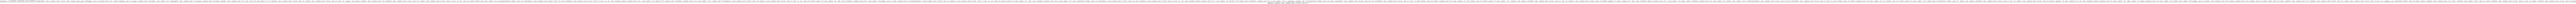

In [12]:
dpmu[1]

In [13]:
solve(dpmu[1],pt)

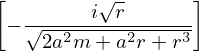

In [14]:
solve(dpmu[1],uphi)

In [15]:
dsmu

In [ ]:
psol

In [ ]:
condicion=0
for i in range(4):
    condicion += sup[i]*udown[i]

La condución a satisfacer es:

In [ ]:
simplify(condicion)

In [ ]:
del(ptheta)
ptheta = Symbol('p^theta', real=True)

pdownsol = [psol[0].rhs, psol[1].rhs, ptheta, psol[2].rhs]
pupsol=up(pdownsol)

In [ ]:
def termino(mu):
    termino=0
    for nu in range(4):
        for alpha in range(4):
            for beta in range(4):
                for sigma in range(4):
                    for rho in range(4):
                        termino += lcup(mu,nu,alpha,beta)*chris.components[(rho,-nu,-sigma)]*udown[rho]*uup[sigma]*sdown[alpha]*udown[beta]
                        
    return termino

Masa=0
for mu in range(4):
    Masa += pupsol[mu]*udown[mu]

def p(mu):
    A=Masa*uup[mu]+termino(mu)
    return simplify(A.subs(th,pi/2))

momentum=[p(mu) for mu in range(4)]

In [ ]:
pupsol[1], momentum[1]

In [ ]:
pupsol[2], momentum[2]

De la componente $1$ o $r$ podemos notar que $C_2$ y $C_3$ en la solución del momentum deben ser 0 para que pueda satisfacerse la igualdad, mientras que de la componente $2$ o $\theta$ damos cuenta que para que $p^{\theta}$ es 0.

Así, las soluciones para el momentum y el spín deben tener la forma:
\begin{align}
p_{\mu} &= [p^{\phi} \left( \frac{a^2 m \omega - am - \omega r^3}{m(a \omega - 1)} \right), 0, 0, p^{\phi}],\\
S^{\mu} &= [0,0,\frac{S}{r},0].
\end{align}

In [ ]:
del(pphi)
pphi = Symbol('p^phi', real=True)

pmu=[pphi*(a**2*m*omega-a*m-omega*r**3)/(m*a*omega-m),0,0,pphi]

def t(mu):
    termino=0
    
    for nu in range(4):
        for alpha in range(4):
            for beta in range(4):
                for sigma in range(4):
                    for rho in range(4):
                        termino += lcup(mu,nu,alpha,beta)*chris.components[(rho,-nu,-sigma)]*udown[rho]*uup[sigma]*sdown[alpha]*udown[beta]
                        
    return termino
                        

Masa2=0
for mu in range(4):
    Masa2 += pmu[mu]*udown[mu]

def p2(mu):
    A=Masa2*uup[mu]+t(mu)
    return simplify(A.subs(th,pi/2))

pmu2=[p2(mu) for mu in range(4)]

In [ ]:
0==pmu[1], pmu[1]==pmu2[1], 0==pmu[2], pmu[2]==pmu2[2]

De esta forma probamos que las componentes $r,\theta$ son iguales luego de aplicar la condición, ahora haremos lo mismo con las componentes $t,\phi$.

In [ ]:
pmu[0],simplify(pmu2[0])

In [ ]:
pmu[3],simplify(pmu2[3])

In [ ]:
eq1=pmu[0]-simplify(pmu2[0])
eq2=pmu[3]-simplify(pmu2[3])
eqtotal=[eq1,eq2]

solve(eqtotal,[S,pphi])

Mostrando así que la componente $\phi$ del momentum y la componente $\theta$ del espín están relacionados como:

In [ ]:
spin=solve(eq1, S)[0]
simplify(spin)